In [42]:
# importing all necessary modules
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
import pickle
import pickle
import gensim

### INFERENCE

In [43]:
# loading cluster
with open('data/ac.pickle', 'rb') as f:
    ac = pickle.load(f)

In [44]:
# load model
model = gensim.models.Word2Vec.load("data/CBOW_APP1.model")

In [45]:
# loading pca & scalar
with open('data/pca.pickle', 'rb') as f:
    pca = pickle.load(f)
with open('data/scaler.pickle', 'rb') as f:
    scaler = pickle.load(f)

In [46]:
sample = open("data/preprocessed_logs_word_APP2.txt")
f = sample.readlines()

# Replaces escape character with space
# f = s.replace("\n", " ")

In [47]:
data = []
# iterate through each sentence in the file
for i in f:
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		if(not re.search('[+-]?([0-9]*[.])?[0-9]+', j.lower())):
			temp.append(j.lower())
	data.append(temp)

In [48]:
new_data = []

for i, sent in enumerate(data):
    vector = [0]*100
    for j, word in enumerate(sent):
        try:
            vector += model.wv[word]
        except KeyError:
            continue
    new_data.append(vector)

In [ ]:
# clustering
vectors = new_data

X_scaled = scaler.transform(vectors)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

X_principal = pca.transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8), facecolor='w')
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

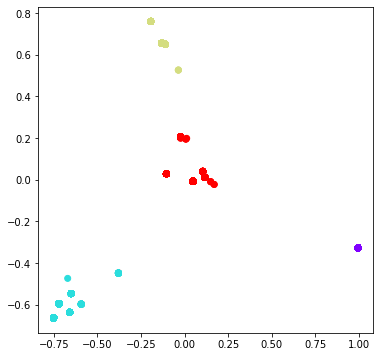

In [49]:
plt.figure(figsize =(6, 6), facecolor='w')
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac.predict(X_principal), cmap ='rainbow')
plt.show()

In [50]:
with open('data/x_of_app2.pickle', 'wb') as f:
    pickle.dump(X_principal, f)

In [40]:
with open('data/x_of_app1.pickle', 'rb') as f:
    x_app1 = pickle.load(f)
x_app1

,P1,P2
0,-0.216523,-0.640313
1,1.057415,0.183130
2,1.057415,0.183130
3,-0.370099,-0.676706
4,1.057415,0.183130
...,...,...
306180,-0.626196,0.770576
306181,-0.370099,-0.676706
306182,-0.626196,0.770576
306183,-0.626196,0.770576


In [41]:
with open('data/x_of_app2.pickle', 'rb') as f:
    x_app2 = pickle.load(f)
x_app2

,P1,P2
0,-0.131825,0.655767
1,0.994918,-0.326739
2,-0.194460,0.759649
3,-0.750851,-0.663016
4,-0.194460,0.759649
...,...,...
195655,-0.194460,0.759649
195656,0.994918,-0.326739
195657,-0.194460,0.759649
195658,-0.194460,0.759649


In [14]:
x_app = pd.concat([x_app1, x_app2], ignore_index=True)

In [15]:
x_app.drop_duplicates().shape[0]

50

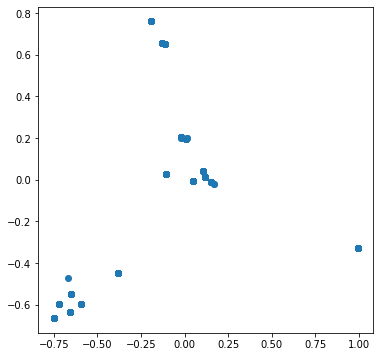

In [16]:
plt.figure(figsize =(6, 6), facecolor='w')
plt.scatter(x_app1['P1'], x_app1['P2'], cmap ='rainbow')
plt.show()

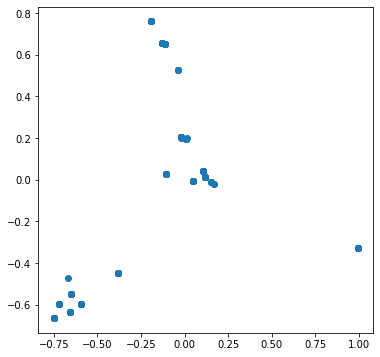

In [17]:
plt.figure(figsize =(6, 6), facecolor='w')
plt.scatter(x_app2['P1'], x_app2['P2'], cmap ='rainbow')
plt.show()

In [18]:
len(x_app1['P1'].unique()), len(x_app2['P1'].unique())

(25, 24)

In [19]:
len(x_app1['P2'].unique()), len(x_app2['P2'].unique())

(26, 24)